# DATA EXPLORATION

In [2]:
# Data Collection, Data Cleaning & Data Manipulation 
import numpy as np 
import pandas as pd 
from sklearn import datasets 

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')

# Models Building 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Classification Problems
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Regression Problems
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

# Explainbale AI (XAI)
# !pip install lime
# import lime.lime_tabular
# !pip install shap
# import shap

# Unsupervised Learning: Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score

In [3]:
import plotly.graph_objects as go

In [4]:
# pip install -U dataprep

In [5]:
# !pip install pycaret[full]

In [6]:
# from dataprep.eda import *
# from pycaret.classification import *

In [7]:
data = pd.read_csv('./aw_fb_data.csv')

In [8]:
data.shape

(6264, 20)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [10]:
data.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6264.0,3132.500000,1808.405375,1.000000,1566.750000,3132.500000,4698.250000,6264.000000
X1,6264.0,1771.144317,1097.988748,1.000000,789.750000,1720.000000,2759.250000,3670.000000
age,6264.0,29.158525,8.908978,18.000000,23.000000,28.000000,33.000000,56.000000
gender,6264.0,0.476533,0.499489,0.000000,0.000000,0.000000,1.000000,1.000000
height,6264.0,169.709052,10.324698,143.000000,160.000000,168.000000,180.000000,191.000000
weight,6264.0,69.614464,13.451878,43.000000,60.000000,68.000000,77.300000,115.000000
steps,6264.0,109.562268,222.797908,1.000000,5.159534,10.092029,105.847222,1714.000000
hear_rate,6264.0,86.142331,28.648385,2.222222,75.598079,77.267680,95.669118,194.333333
calories,6264.0,19.471823,27.309765,0.056269,0.735875,4.000000,20.500000,97.500000
distance,6264.0,13.832555,45.941437,0.000440,0.019135,0.181719,15.697188,335.000000


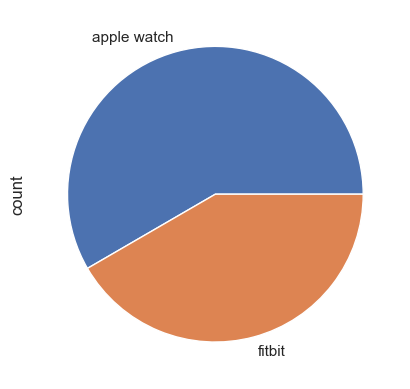

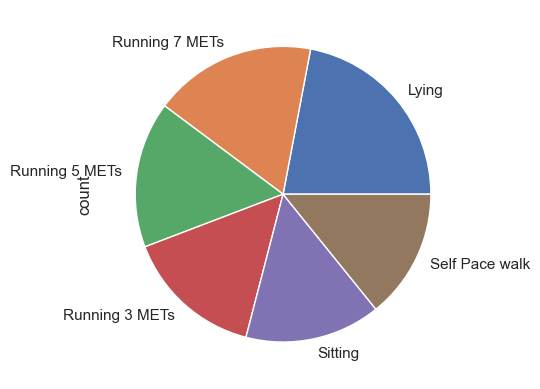

In [12]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

<Axes: xlabel='gender', ylabel='count'>

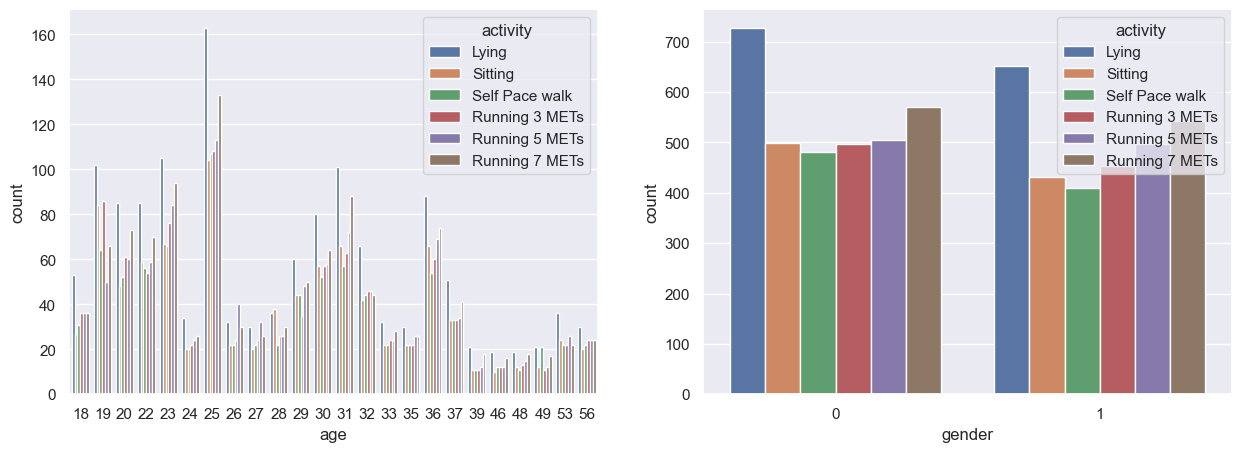

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axs[0],x='age', hue='activity', data=data)
sns.countplot(ax=axs[1],x='gender', hue='activity', data=data)

<Axes: xlabel='device', ylabel='activity'>

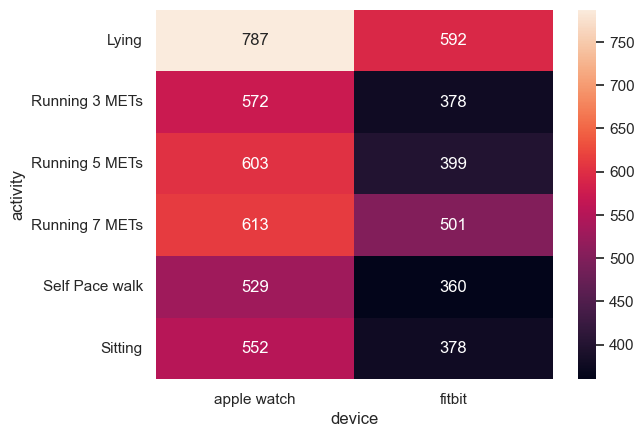

In [14]:
sns.heatmap(pd.crosstab(data["activity"],data["device"]),annot=True,fmt='d')

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'X1'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>],
       [<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>],
       [<Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>,
        <Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>],
       [<Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>, <Axes: >,
        <Axes: >]], dtype=object)

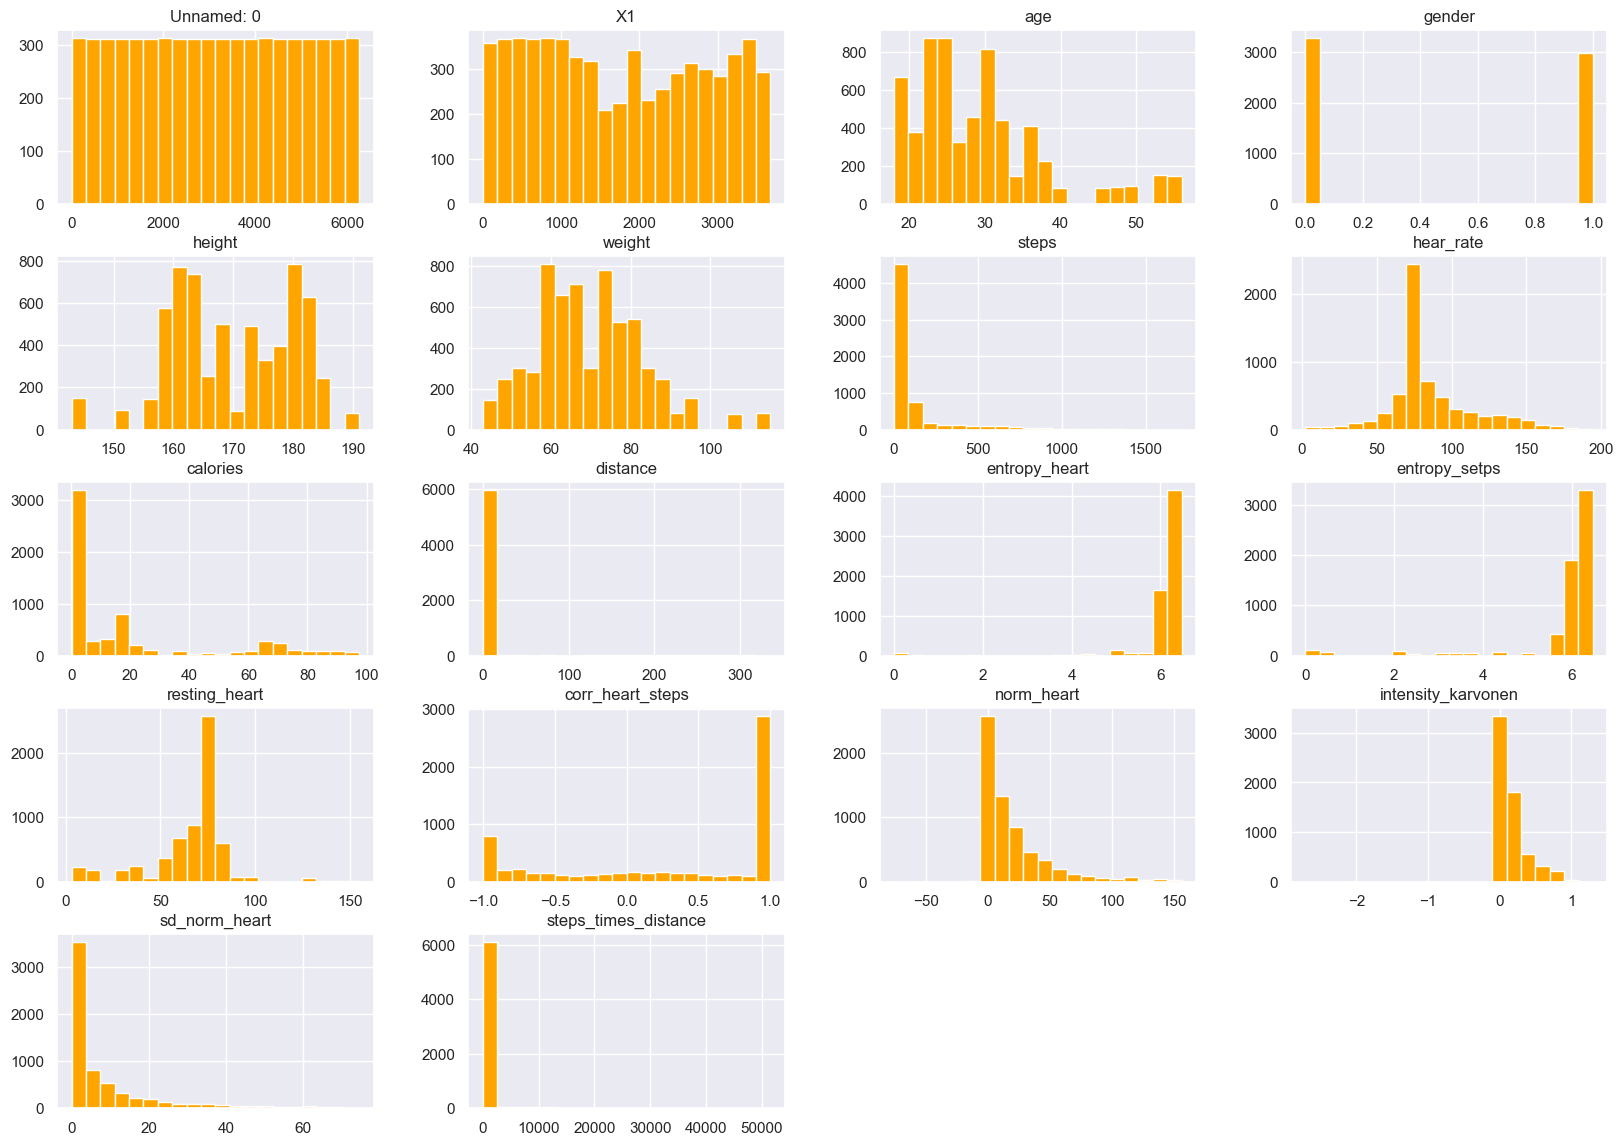

In [15]:
# plt.rcParams.update({'font.size': 10})

sns.set(font_scale = 1)

data.hist(bins = 20, color = 'orange', figsize = (20, 14))

In [16]:
data.activity.value_counts()

activity
Lying             1379
Running 7 METs    1114
Running 5 METs    1002
Running 3 METs     950
Sitting            930
Self Pace walk     889
Name: count, dtype: int64

In [17]:
data[data.activity == 'Lying'].head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [18]:
data[data.activity == 'Running 7 METs'].head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
63,64,64,20,1,168.0,65.4,14.222222,59.50,17.9738,0.009949,6.221612,6.116349,59.0,0.805555,0.50,0.003546,4.037345,0.141495,apple watch,Running 7 METs
64,65,65,20,1,168.0,65.4,14.111111,60.25,17.9766,0.009594,6.221612,6.116349,59.0,0.971239,1.25,0.008865,5.074692,0.135388,apple watch,Running 7 METs
65,66,66,20,1,168.0,65.4,14.000000,61.00,17.9794,0.009240,6.221612,6.116349,59.0,0.989896,2.00,0.014184,6.422616,0.129360,apple watch,Running 7 METs
66,67,67,20,1,168.0,65.4,81.583333,64.00,17.9822,0.053872,6.221612,6.116349,59.0,0.996166,5.00,0.035461,7.526619,4.395030,apple watch,Running 7 METs
67,68,68,20,1,168.0,65.4,149.166667,67.00,17.9850,0.098503,6.221612,6.116349,59.0,0.659855,8.00,0.056738,8.625262,14.693414,apple watch,Running 7 METs


In [19]:
data.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

# TRAIN-TEST SPLIT

In [20]:
# df_aw = data[data['device']=='apple watch']

# df_aw=df_aw.drop('device', axis=1)

In [21]:
np.random.seed(42)

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

# DATA CLEANING

In [23]:
train_set.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [24]:
# df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [25]:
# corr_matrix.columns

In [26]:
train_set.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [27]:
train_set.duplicated().sum()

0

# DATA ANALYSIS

In [28]:
train_set.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [29]:
categorical_corr_matrix = train_set.select_dtypes(include = 'object')

categorical_corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5011 entries, 2024 to 860
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   device    5011 non-null   object
 1   activity  5011 non-null   object
dtypes: object(2)
memory usage: 117.4+ KB


In [30]:
for col in categorical_corr_matrix.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

device: 2


activity: 6




In [31]:
labels = ['Lying','Running 7 METs','Running 5 METs','Running 3 METs', 'Sitting', 'Self Pace walk']
values = train_set['activity'].value_counts()
colors = ['red', 'royalblue','green','yellow','pink','grey']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_traces(hoverinfo='label+value',textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='6 types of Activity', 
                                    x=0.50, y=0.5, font_size=15, 
                                    showarrow=False)])
fig.show()

In [32]:
num_df = train_set.select_dtypes(include = 'number')

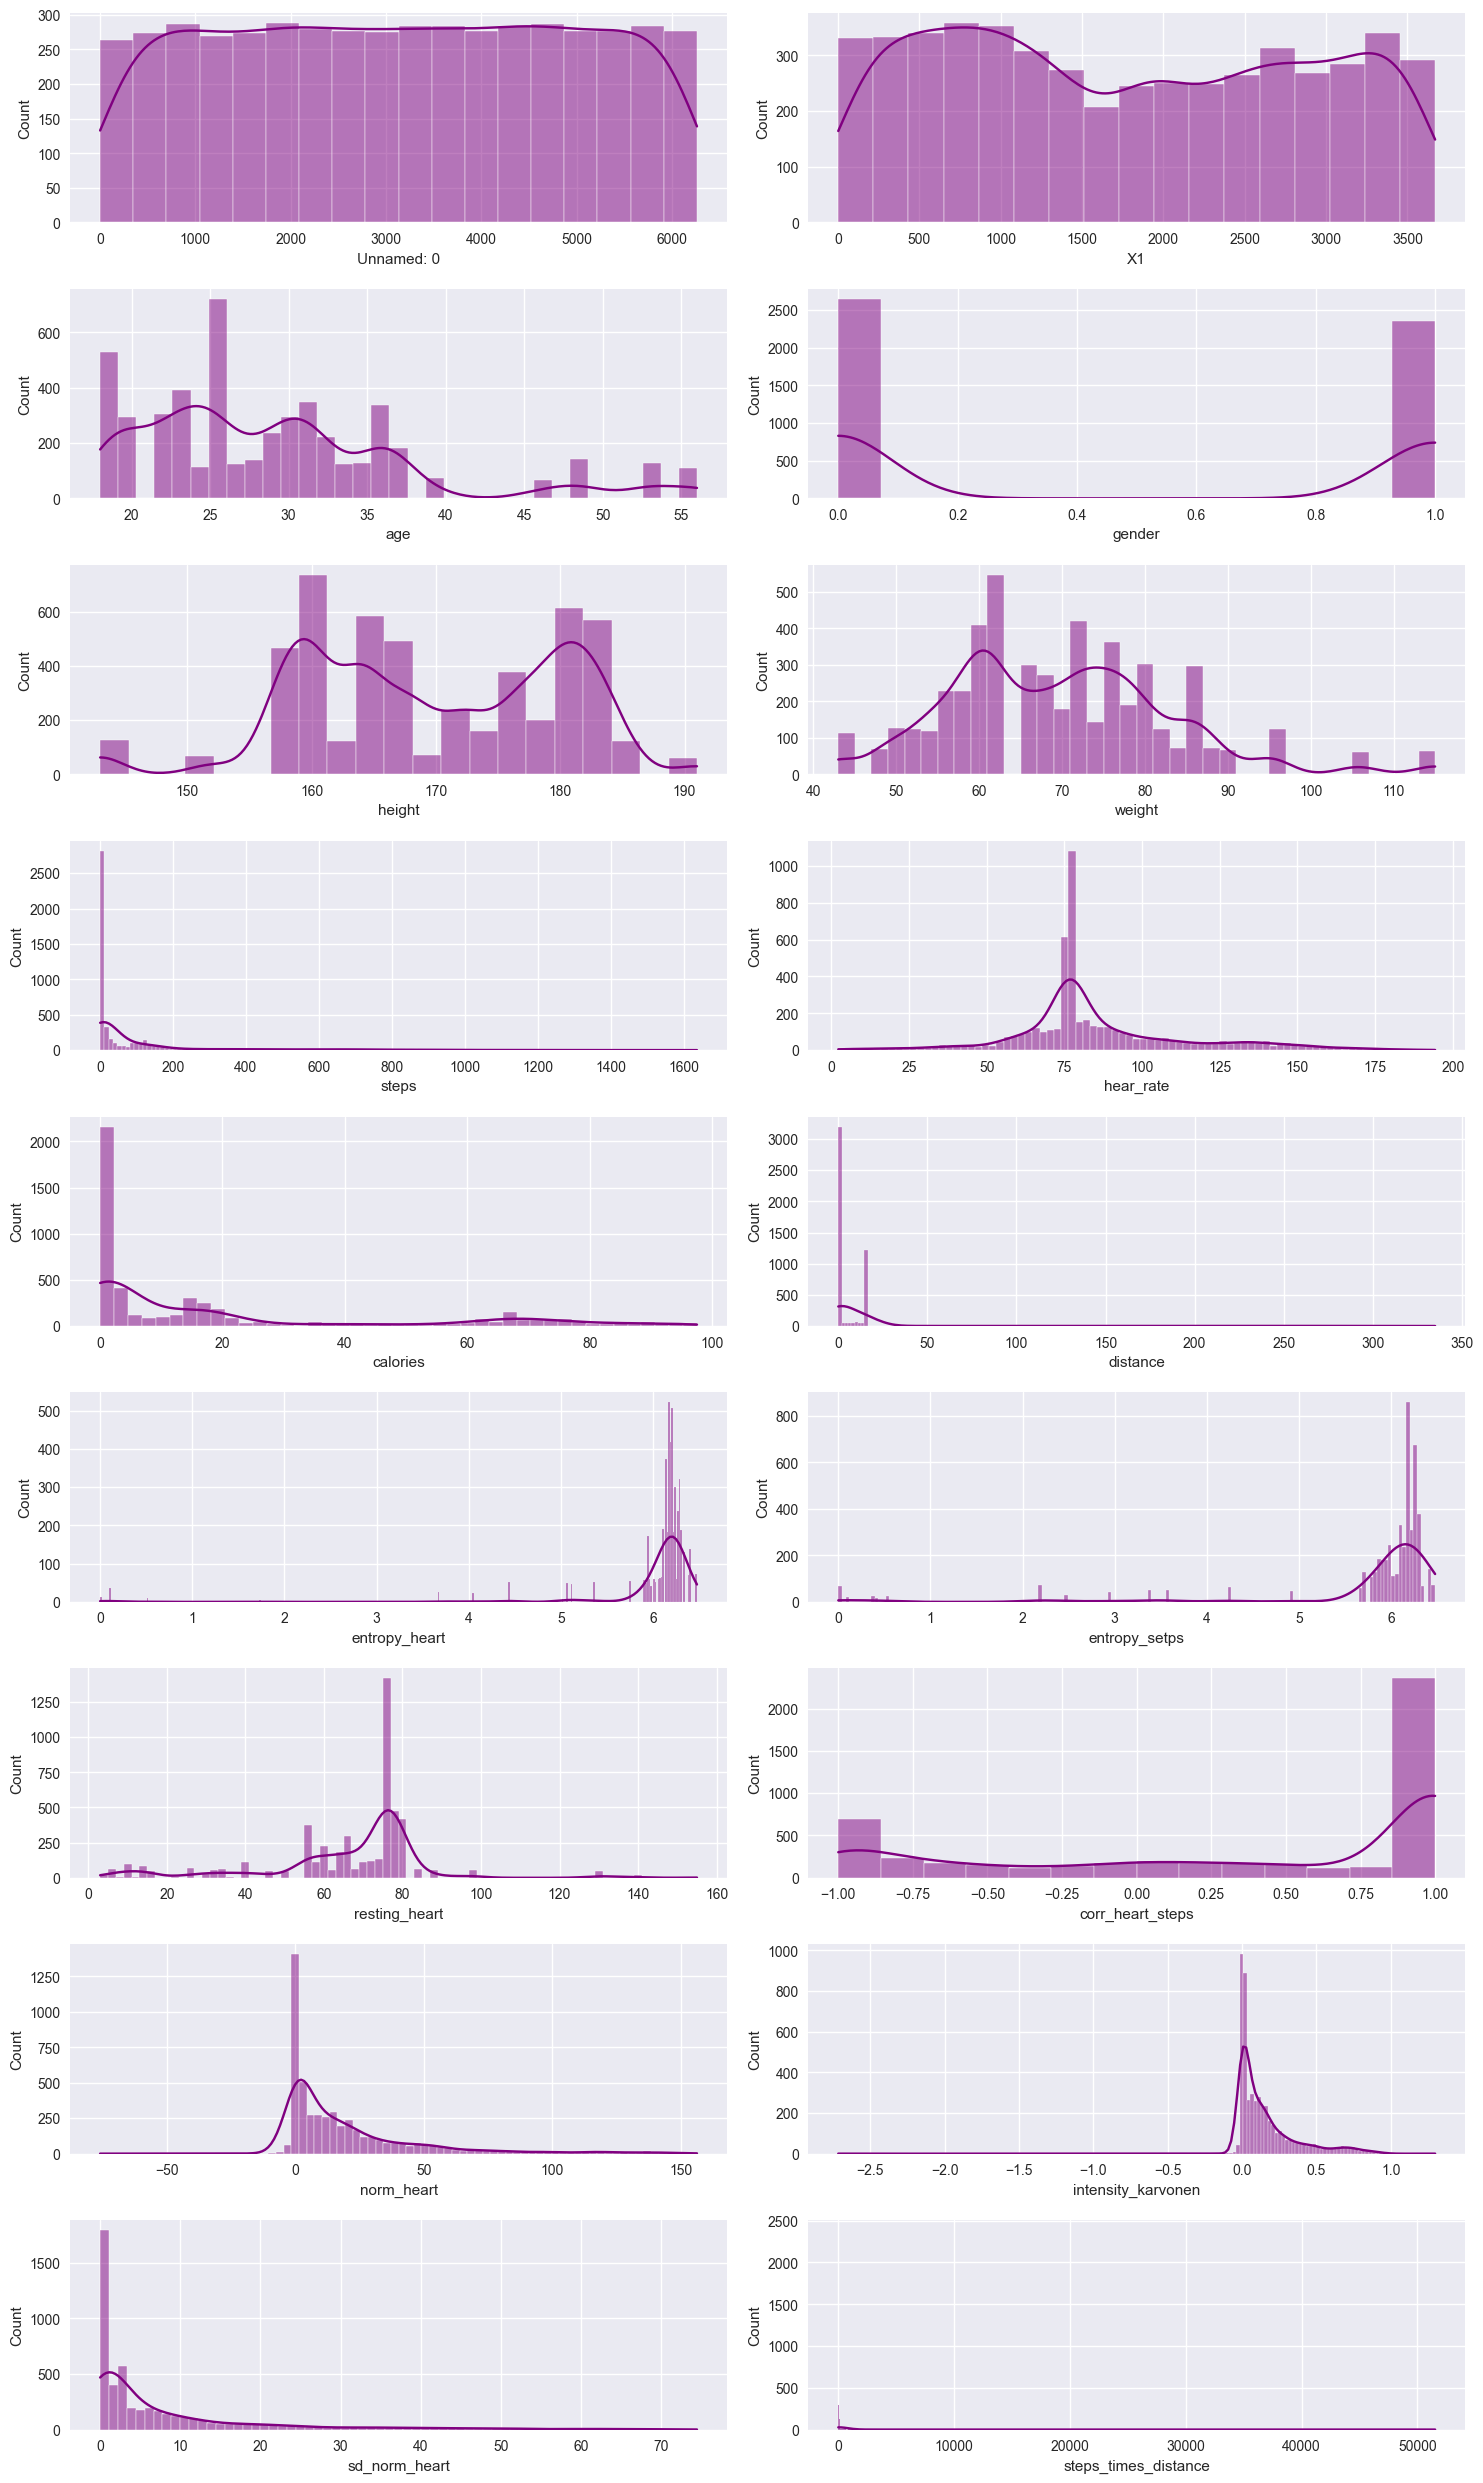

In [33]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.histplot(x=num_df[name], kde = True, ax=axes[i, j], color = 'purple')
    y = y + 1

plt.tight_layout()
plt.show()

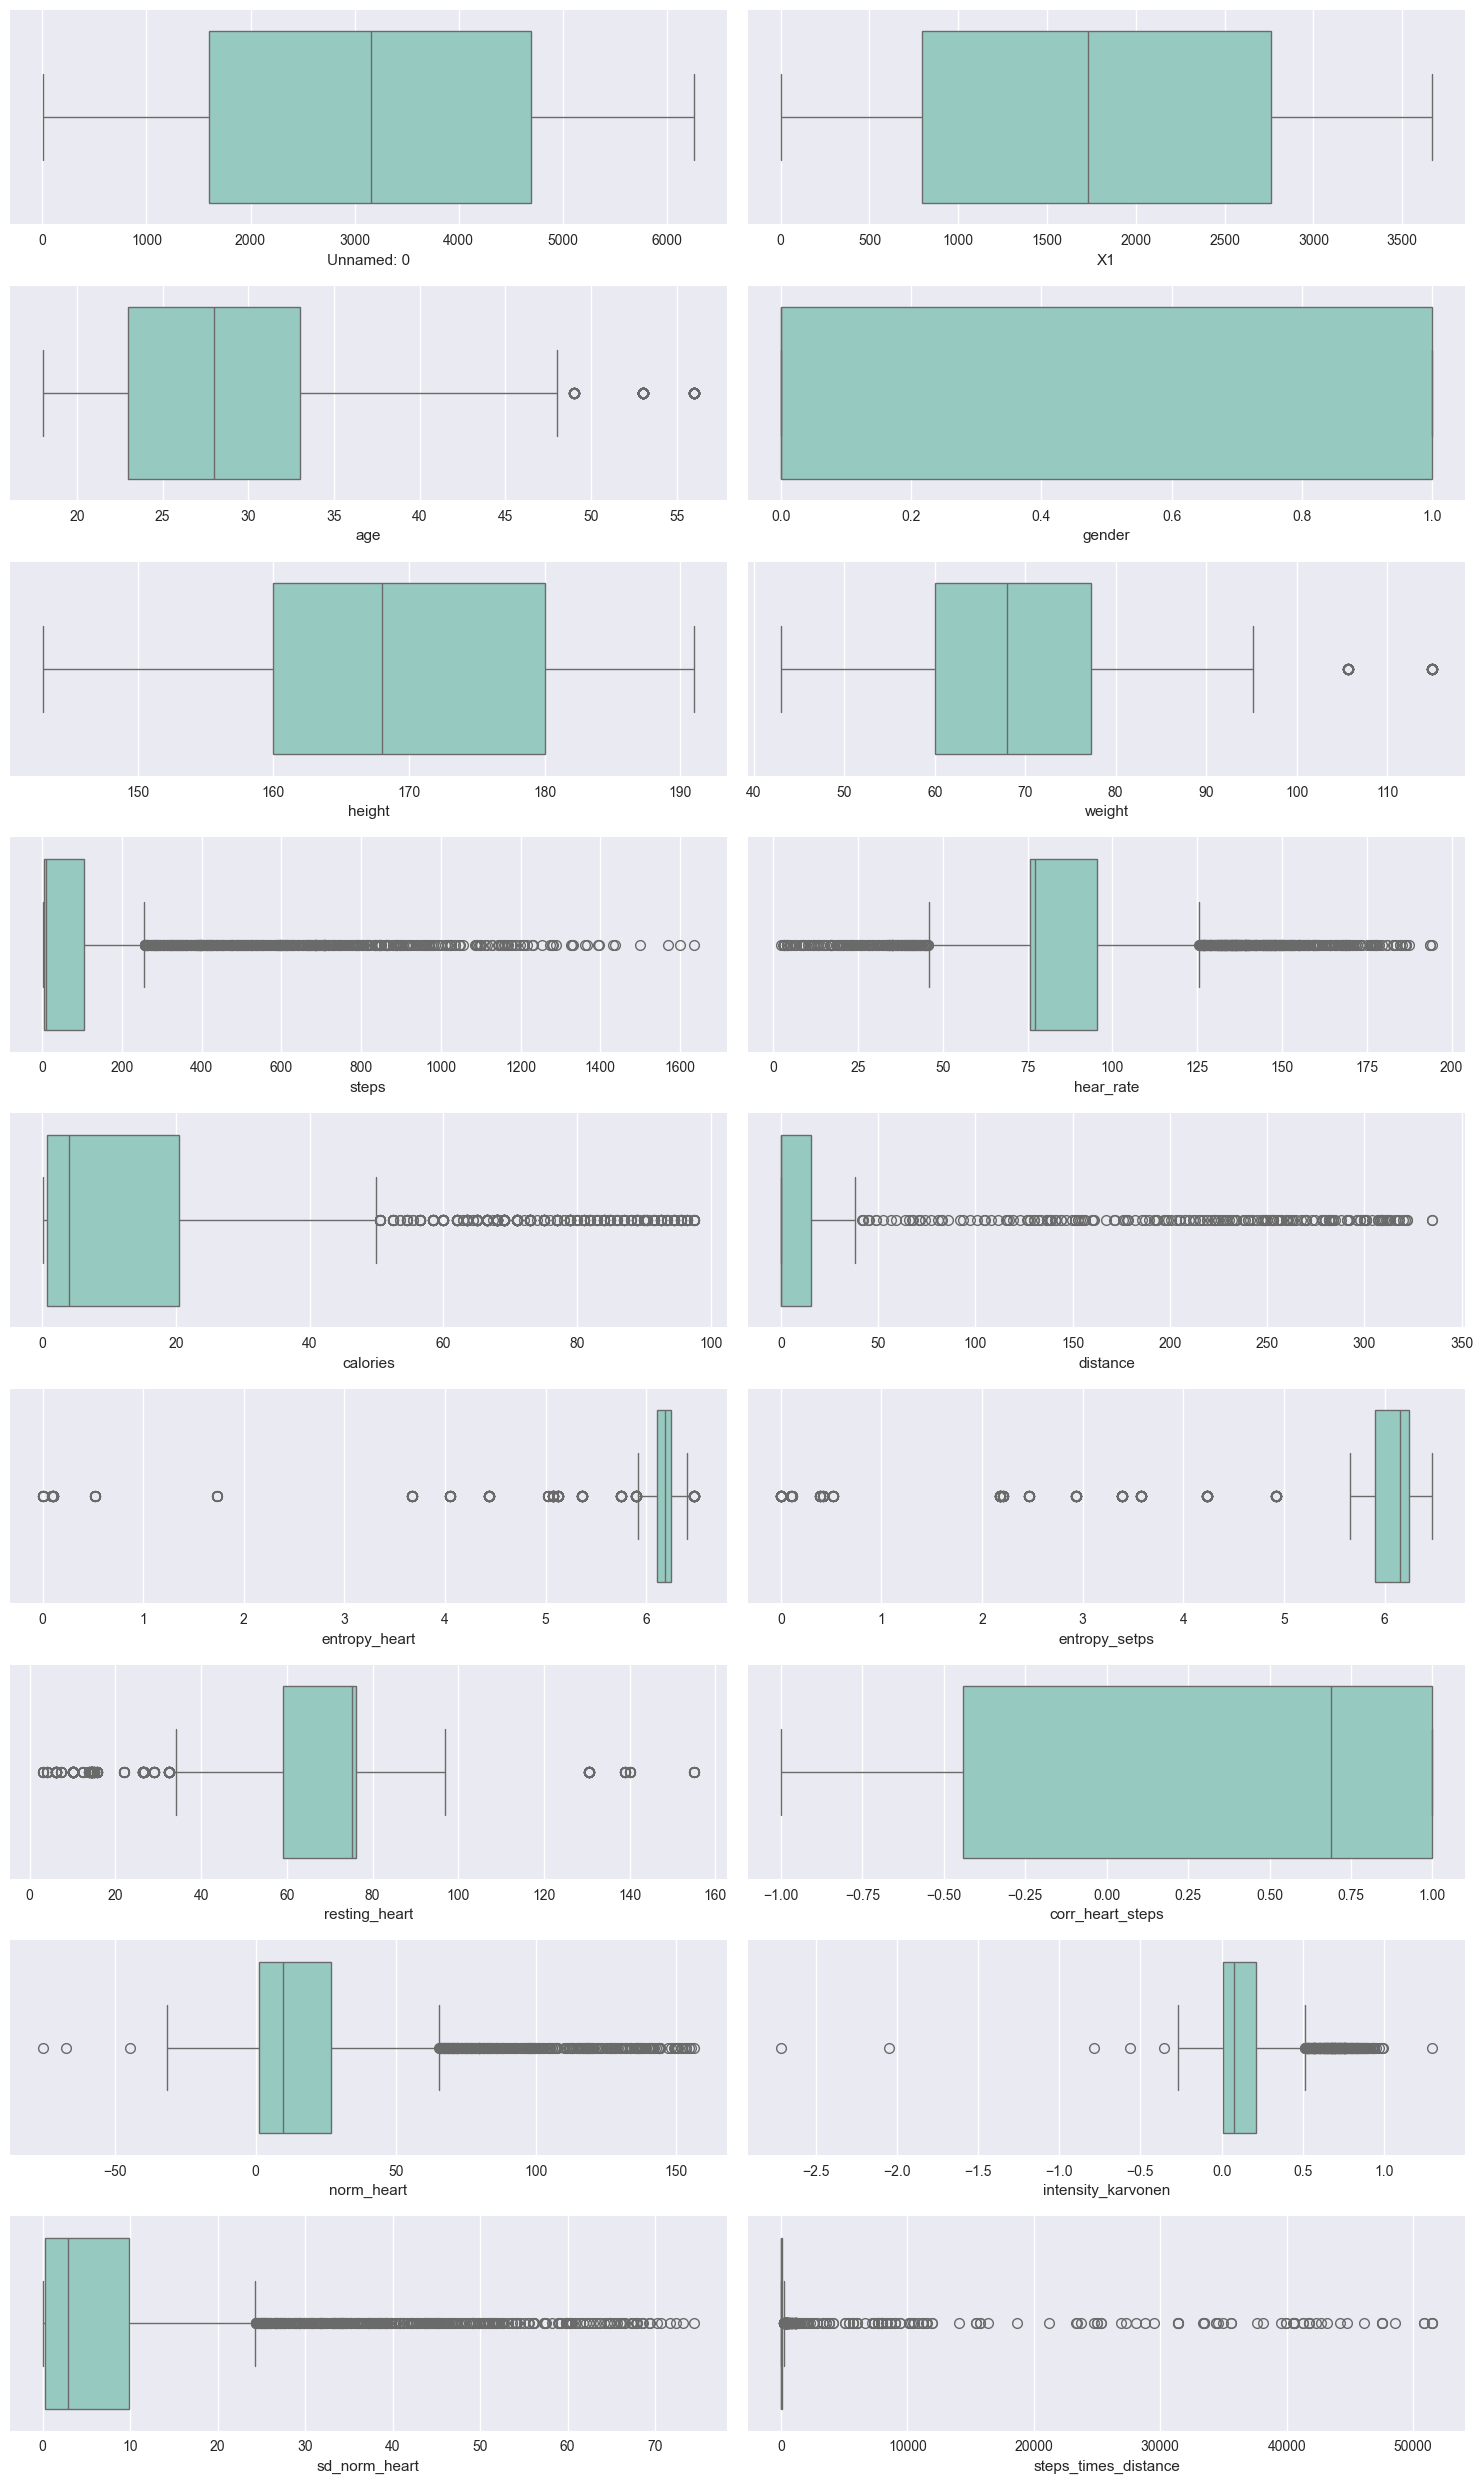

In [34]:
plt.style.use('seaborn')

names = list(num_df.columns)

plot_per_row = 2

f, axes = plt.subplots(round(len(names)/plot_per_row), plot_per_row, figsize = (15, 25))

y = 0;

for name in names:
    i, j = divmod(y, plot_per_row)
    sns.boxplot(x=num_df[name], ax=axes[i, j], palette = 'Set3')
    y = y + 1

plt.tight_layout()
plt.show()

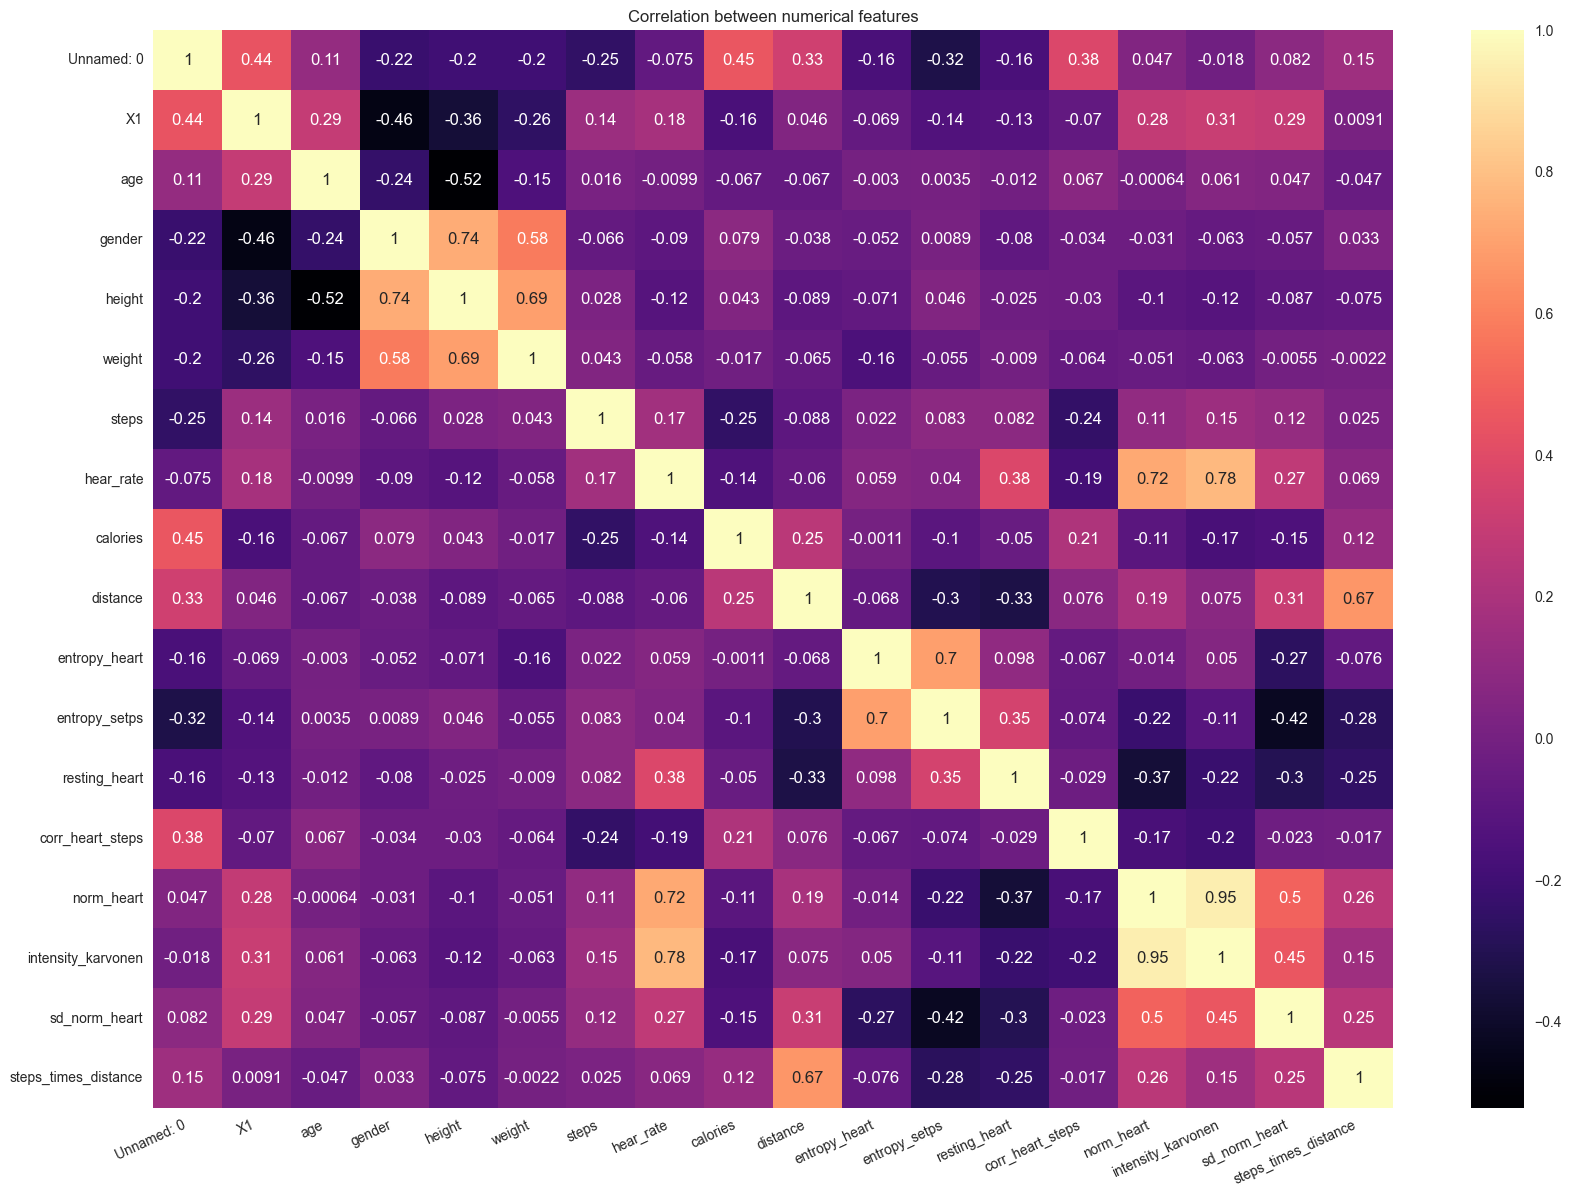

In [35]:
plt.figure(figsize = (20, 14))

corr_matrix = num_df.corr()

g = sns.heatmap(
    corr_matrix,
    annot = True,
    cmap='magma',
)

g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')

plt.title('Correlation between numerical features')
plt.show()

In [40]:
corr_matrix

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
Unnamed: 0,1.000000,0.441034,0.114942,-0.219202,-0.196062,-0.198568,-0.253174,-0.074520,0.450830,0.333736,-0.161446,-0.323692,-0.163702,0.378838,0.047220,-0.017571,0.082438,0.151753
X1,0.441034,1.000000,0.288278,-0.464478,-0.361815,-0.260331,0.142199,0.183488,-0.164232,0.046025,-0.068715,-0.138758,-0.129316,-0.070160,0.281093,0.306817,0.291799,0.009050
age,0.114942,0.288278,1.000000,-0.241113,-0.521933,-0.149695,0.016328,-0.009878,-0.067113,-0.067460,-0.002985,0.003461,-0.012457,0.067202,-0.000639,0.060604,0.046676,-0.047002
gender,-0.219202,-0.464478,-0.241113,1.000000,0.737376,0.581472,-0.066482,-0.090361,0.079443,-0.038277,-0.052203,0.008929,-0.079876,-0.034360,-0.031280,-0.063328,-0.057163,0.032543
height,-0.196062,-0.361815,-0.521933,0.737376,1.000000,0.692059,0.028305,-0.121576,0.043095,-0.088745,-0.071076,0.045603,-0.025286,-0.029793,-0.103425,-0.123240,-0.086663,-0.075390
weight,-0.198568,-0.260331,-0.149695,0.581472,0.692059,1.000000,0.043050,-0.057680,-0.017247,-0.065490,-0.156652,-0.054664,-0.009026,-0.063674,-0.051285,-0.062822,-0.005510,-0.002166
steps,-0.253174,0.142199,0.016328,-0.066482,0.028305,0.043050,1.000000,0.167277,-0.251981,-0.088143,0.022179,0.083456,0.081939,-0.242522,0.107112,0.148022,0.115485,0.024538
hear_rate,-0.074520,0.183488,-0.009878,-0.090361,-0.121576,-0.057680,0.167277,1.000000,-0.141780,-0.059787,0.058582,0.039804,0.378905,-0.186341,0.723126,0.775660,0.274501,0.069244
calories,0.450830,-0.164232,-0.067113,0.079443,0.043095,-0.017247,-0.251981,-0.141780,1.000000,0.253926,-0.001132,-0.104642,-0.049582,0.214190,-0.105614,-0.169007,-0.150135,0.121289
distance,0.333736,0.046025,-0.067460,-0.038277,-0.088745,-0.065490,-0.088143,-0.059787,0.253926,1.000000,-0.067850,-0.303387,-0.329213,0.075590,0.185574,0.074852,0.309738,0.666906


# Model 1

Mean Squared Error: 0.055311510430624516


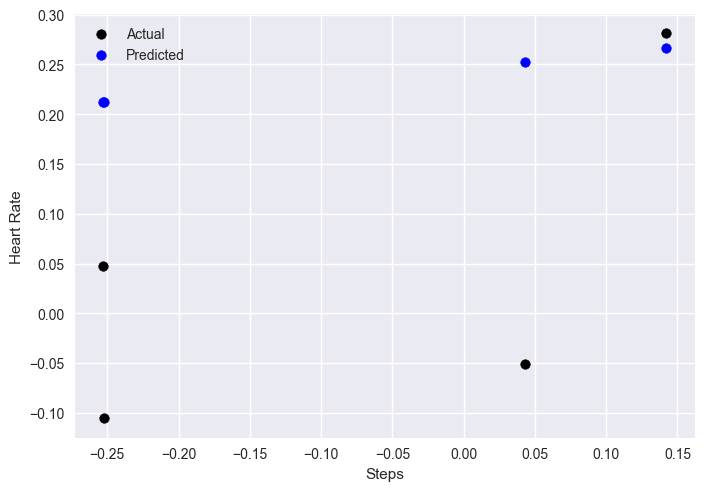

In [41]:

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = corr_matrix[['age', 'norm_heart', 'steps', 'distance']]

kmeans = KMeans(n_clusters=3, random_state=42)
corr_matrix['age_cluster'] = kmeans.fit_predict(corr_matrix[['age']])

X = corr_matrix[['age_cluster', 'steps']]
y = corr_matrix['norm_heart']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression  

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



# Visualize the results

In [ ]:
plt.scatter(X_test['steps'], y_test, color='black', label='Actual')
plt.scatter(X_test['steps'], y_pred, color='blue', label='Predicted')
plt.xlabel('Steps')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

In [ ]:
df_a = data[data['device']=='apple watch'].copy()
df_a.reset_index(drop=True,inplace=True)

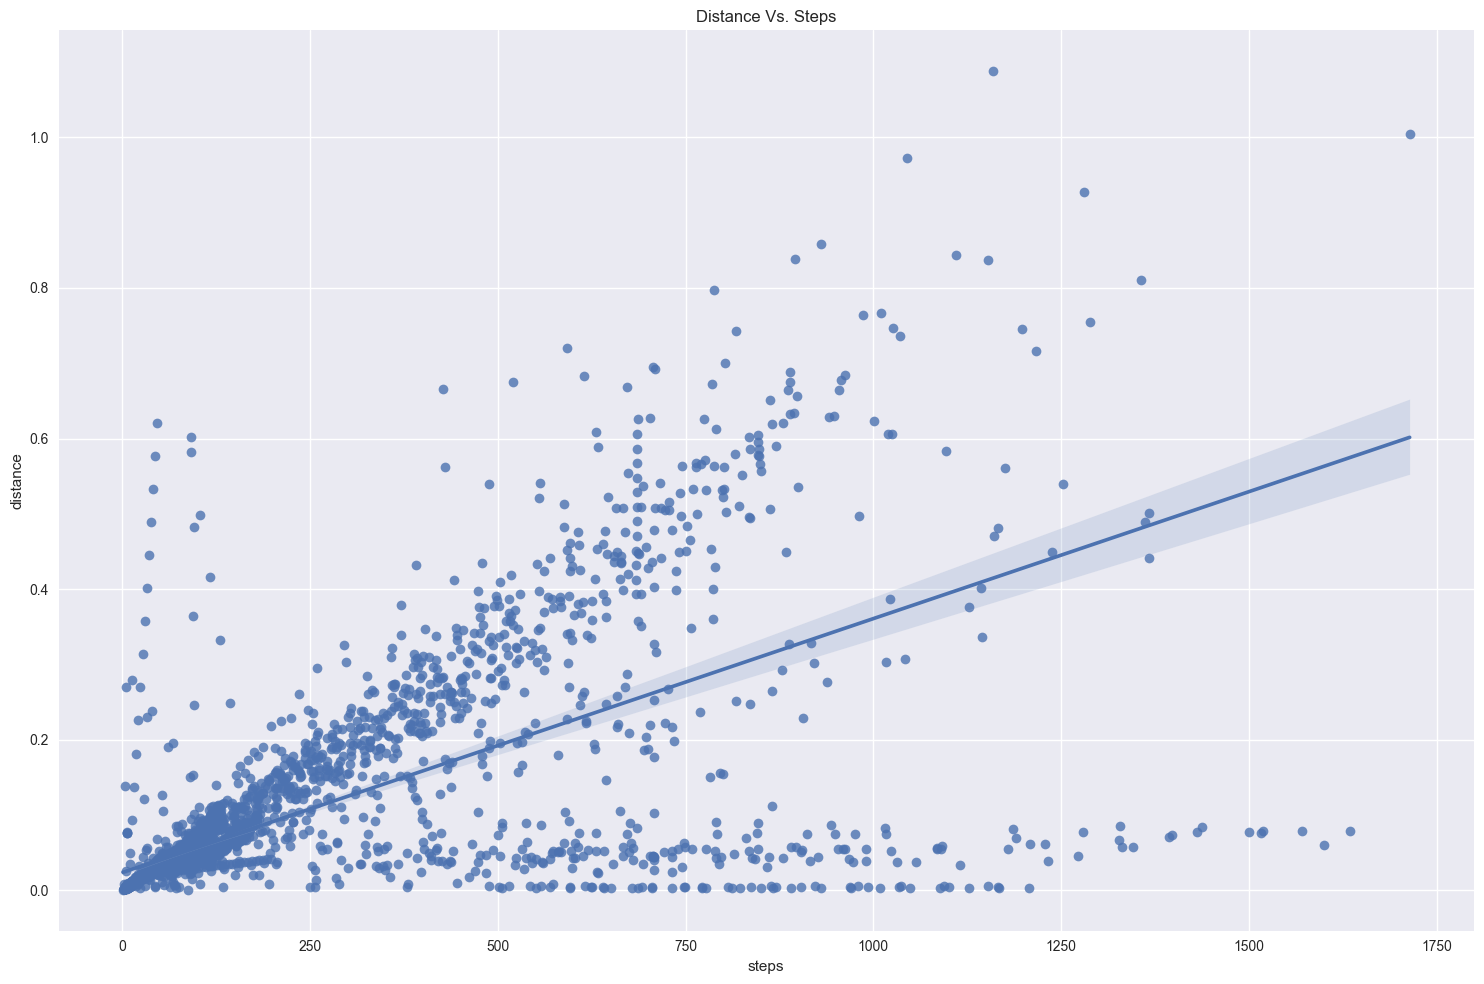

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(data = df_a, x='steps', y='distance')
plt.title('Distance Vs. Steps')
plt.tight_layout()

# MODEL2 


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming corr_matrix is your correlation matrix
# If not, make sure to select the relevant columns for clustering and regression

# Feature selection based on correlation matrix
features = corr_matrix[['age', 'hear_rate', 'steps', 'weight', 'resting_heart']]

# KMeans clustering based on age
kmeans = KMeans(n_clusters=3, random_state=42)
corr_matrix['age_cluster'] = kmeans.fit_predict(corr_matrix[['age']])

# Set the conditions for predicting a heart attack
corr_matrix['age'] = ((corr_matrix['hear_rate'] > corr_matrix['resting_heart']) &
                        (corr_matrix['hear_rate'] > corr_matrix.groupby('age_cluster')['hear_rate'].transform('mean')) &
                        (corr_matrix['steps'] < corr_matrix['steps'].mean()) &
                        (corr_matrix['weight'] > corr_matrix['weight'].mean()) &
                        (corr_matrix['age'] > corr_matrix['age'].mean())).astype(int)

# Prepare data for classification
X = corr_matrix[[ 'steps', 'weight', 'resting_heart']]
y = corr_matrix['age_cluster']

# Check if there are instances where age is 1
if 1 not in y.unique():
    print("No instances where 'age' is 1. Adjust conditions or data.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

No instances where 'age' is 1. Adjust conditions or data.


,steps,weight,resting_heart
gender,-0.066482,0.581472,-0.079876
corr_heart_steps,-0.242522,-0.063674,-0.029226
sd_norm_heart,0.115485,-0.005510,-0.299868
intensity_karvonen,0.148022,-0.062822,-0.224418
entropy_setps,0.083456,-0.054664,0.350302
age,0.016328,-0.149695,-0.012457
distance,-0.088143,-0.065490,-0.329213
steps_times_distance,0.024538,-0.002166,-0.248895
height,0.028305,0.692059,-0.025286
resting_heart,0.081939,-0.009026,1.000000


# FEATURES-TARGET SPLIT

In [ ]:
X_train = train_set.copy()
y_train = X_train.pop("activity")

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)

In [ ]:
X_test = test_set.copy()
y_test = X_test.pop("activity")

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_test = label_encoder.fit_transform(y_test)

# DATA PIPELINE

In [ ]:
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

num_attribs = ['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance']

cat_attribs = ['device']

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             RobustScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, num_attribs),
    (cat_pipeline, cat_attribs))

In [ ]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Unnamed: 0', 'X1', 'age', 'gender', 'height',
                                  'weight', 'steps', 'hear_rate', 'calories',
                                  'distance', 'entropy_heart', 'entropy_setps',
                                  'resting_heart', 'corr_heart_steps',
                                  'norm_heart', 'intensity_karvonen',
                                  'sd_norm_heart', 'steps_times_distance']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['device'])])

In [ ]:
def print_score(classifier, X_train, y_train, X_test, y_test):
        
    # Training set
    
    print('\n\n')

    print("TRAINING RESULTS:\n")

    # Predict
    y_train_pred = classifier.predict(X_train)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_train, y_train_pred, digits = 4)}\n')
    
#     print(f'ROC AUC Score: {roc_auc_score(y_train, y_train_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}\n')
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    ax[0].set_title("train")
    ax[1].set_title("test")
    
    print(sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="g", ax=ax[0]))
    
    print('\n\n')
    
    # Test set

    print("TEST RESULTS:\n")

    # Predict
    y_test_pred = classifier.predict(X_test)

    # Evaluation
    print(f'Classification Report:\n{classification_report(y_test, y_test_pred, digits = 4)}\n')

#     print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}\n')

    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}\n')
    
    print(sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="g", ax=ax[1]))
    
    print('\n\n')

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
import scipy.stats as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
classifier = make_pipeline(preprocessing, LinearRegression())

classifier.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('linearregression', LinearRegression())])

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('logistic_regression', LogisticRegression())])

In [ ]:
classifier.named_steps["logistic_regression"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
C = 100
penalty = 'l2'
solver = 'newton-cg'
max_iter = 1000

classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("logistic_regression", LogisticRegression(C=C, penalty = penalty, solver = solver, max_iter = max_iter)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('logistic_regression',
                 LogisticRegression(C=100, max_iter=1000, solver='newton-cg'))])

In [ ]:
classifier.named_steps["logistic_regression"].get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
feature_names = classifier[:-1].get_feature_names_out()

importances = pd.DataFrame(data={
    'Attribute': feature_names,
    'Importance': classifier.named_steps["logistic_regression"].coef_[0]
})

In [ ]:
importances

,Attribute,Importance
0,pipeline-1__Unnamed: 0,0.629501
1,pipeline-1__X1,-0.455811
2,pipeline-1__age,-0.064393
3,pipeline-1__gender,0.069874
4,pipeline-1__height,-0.134149
5,pipeline-1__weight,0.030097
6,pipeline-1__steps,-0.034441
7,pipeline-1__hear_rate,0.151453
8,pipeline-1__calories,-0.774207
9,pipeline-1__distance,-0.046861


In [ ]:
importances = importances.sort_values(by='Importance', ascending=False)

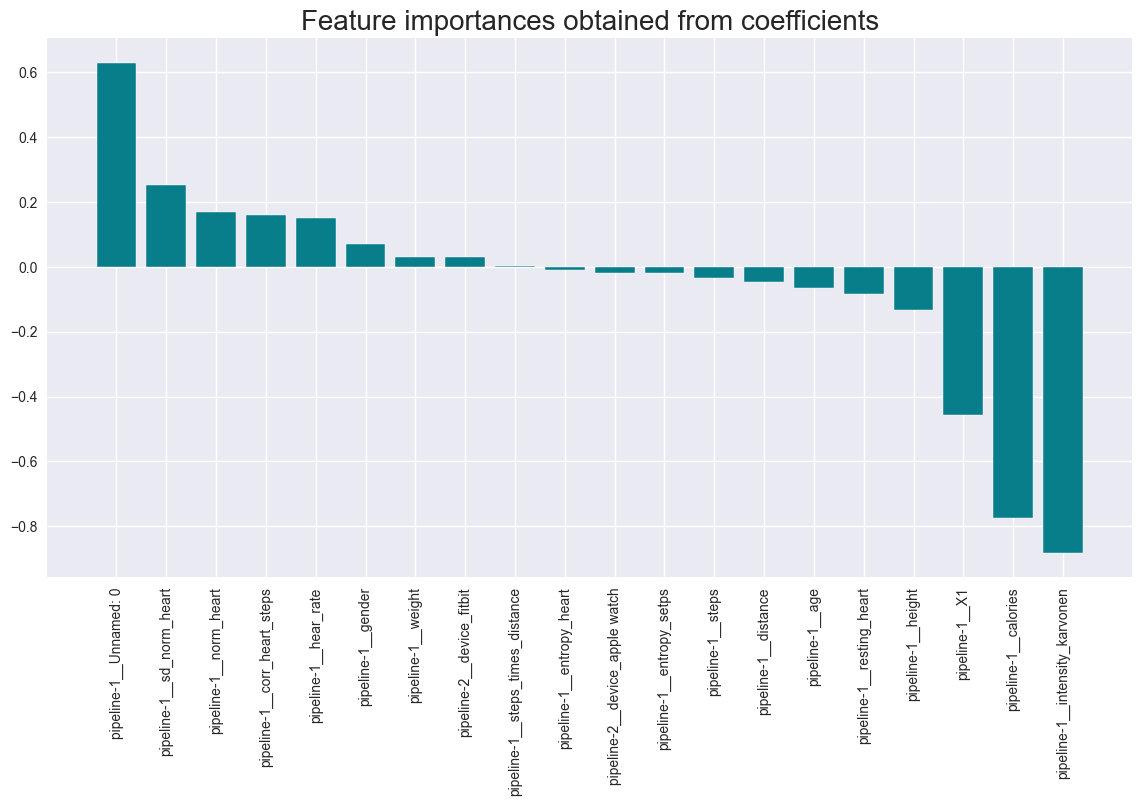

In [ ]:
plt.figure(figsize = (14, 7))

plt.bar(x=importances['Attribute'], height = importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
lgbm = create_model("lightgbm")
plot_model(estimator = lgbm , plot= "learning")

# RANDOM FOREST

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(random_state = 42)),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_heart',
                                                   'intensity_karvonen',
                                                   'sd_norm_heart',
                                                   'steps_times_distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['device'])])),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [ ]:
classifier.named_steps["random_forest"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1106
           1     1.0000    1.0000    1.0000       775
           2     1.0000    1.0000    1.0000       794
           3     1.0000    1.0000    1.0000       879
           4     1.0000    1.0000    1.0000       711
           5     1.0000    1.0000    1.0000       746

    accuracy                         1.0000      5011
   macro avg     1.0000    1.0000    1.0000      5011
weighted avg     1.0000    1.0000    1.0000      5011


Confusion Matrix:
[[1106    0    0    0    0    0]
 [   0  775    0    0    0    0]
 [   0    0  794    0    0    0]
 [   0    0    0  879    0    0]
 [   0    0    0    0  711    0]
 [   0    0    0    0    0  746]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.8539    0.8352    0.8444       273
           1

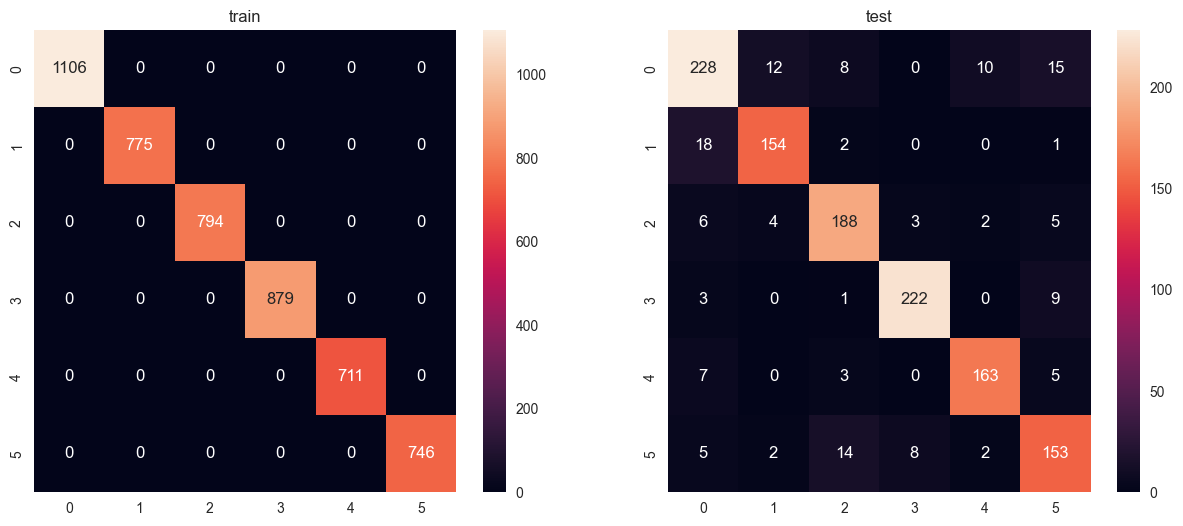

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

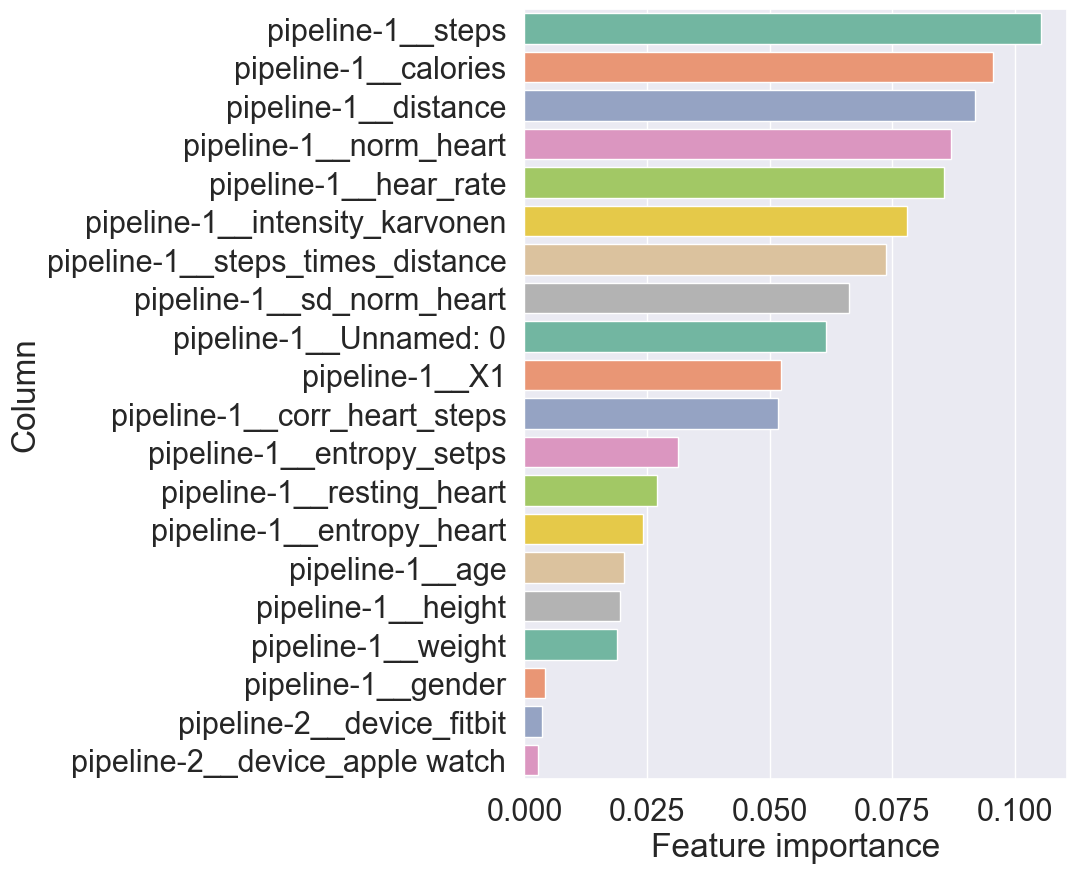

In [ ]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["random_forest"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');

# XGBOOST

In [ ]:
classifier = Pipeline([
    ("preprocessing", preprocessing),
    ("xgboost", XGBClassifier()),
])

classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unnamed: 0', 'X1', 'age',
                                                   'gender', 'height', 'weight',
                                                   'steps', 'hear_rate',
                                                   'calories', 'distance',
                                                   'entropy_heart',
                                                   'entropy_setps',
                                                   'resting_heart',
                                                   'corr_heart_steps',
                                                   'norm_hear...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
classifier.named_steps["xgboost"].get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}




TRAINING RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1106
           1     1.0000    1.0000    1.0000       775
           2     1.0000    1.0000    1.0000       794
           3     1.0000    1.0000    1.0000       879
           4     1.0000    1.0000    1.0000       711
           5     1.0000    1.0000    1.0000       746

    accuracy                         1.0000      5011
   macro avg     1.0000    1.0000    1.0000      5011
weighted avg     1.0000    1.0000    1.0000      5011


Confusion Matrix:
[[1106    0    0    0    0    0]
 [   0  775    0    0    0    0]
 [   0    0  794    0    0    0]
 [   0    0    0  879    0    0]
 [   0    0    0    0  711    0]
 [   0    0    0    0    0  746]]

Axes(0.125,0.11;0.281818x0.77)



TEST RESULTS:

Classification Report:
              precision    recall  f1-score   support

           0     0.8667    0.8095    0.8371       273
           1

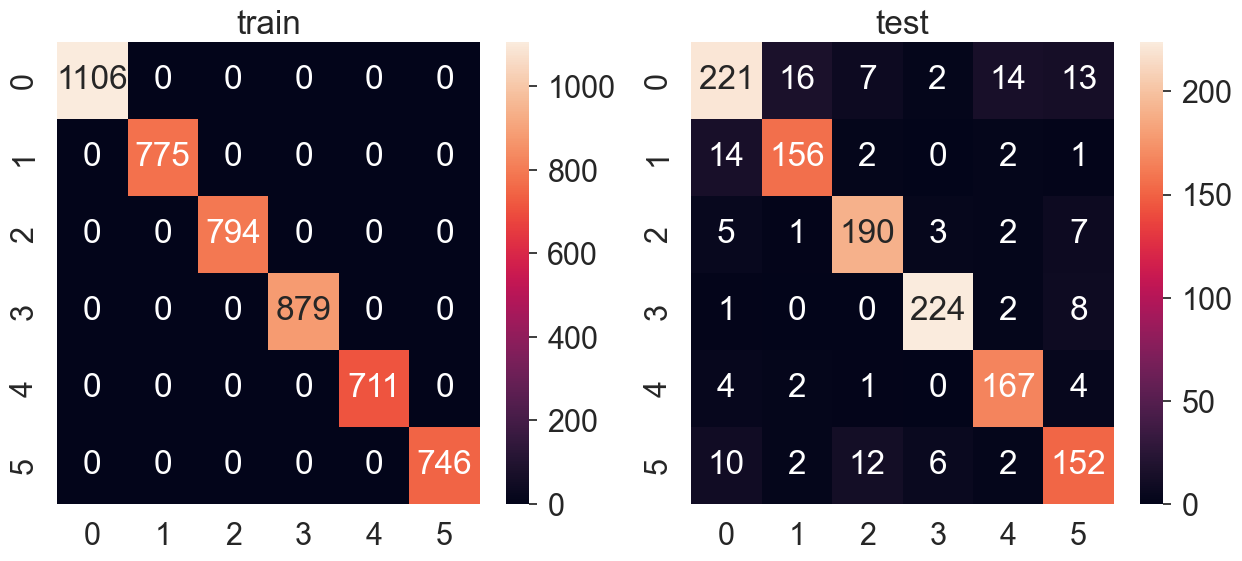

In [ ]:
print_score(classifier, X_train, y_train, X_test, y_test)

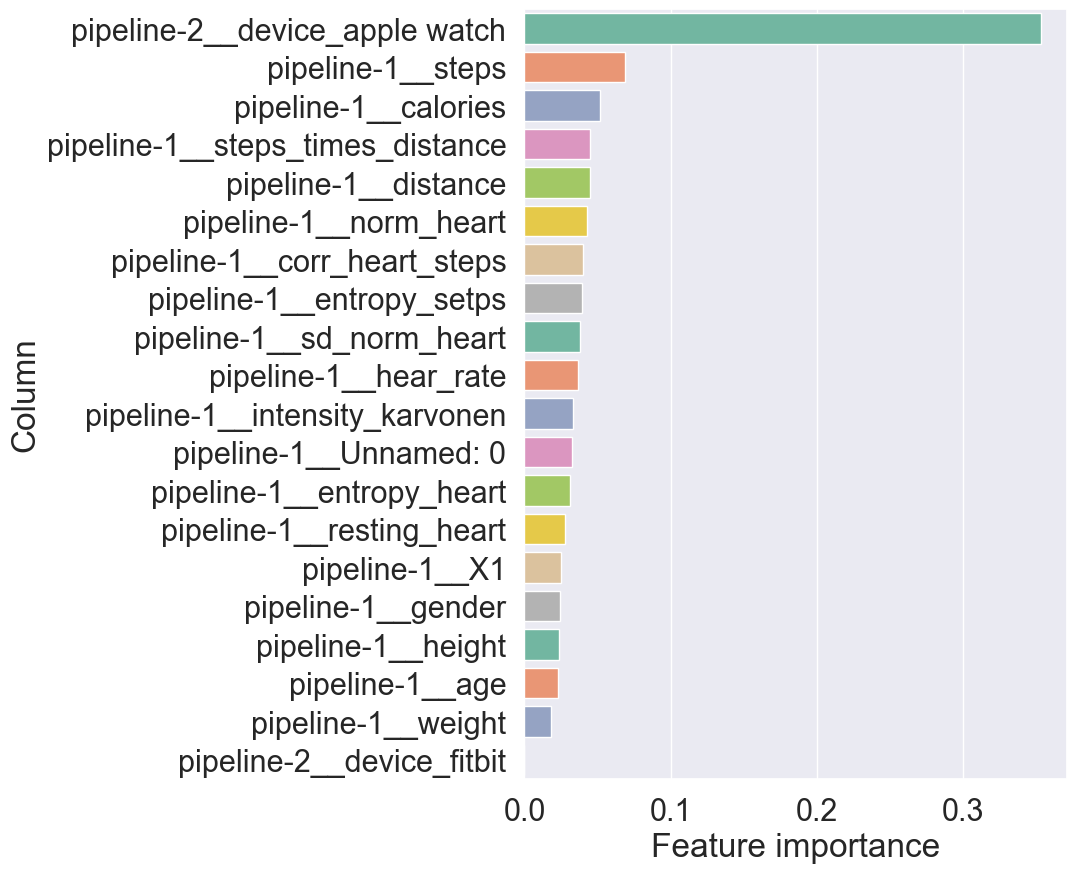

In [ ]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': classifier.named_steps["xgboost"].feature_importances_
    }
).sort_values('Feature importance', ascending = False)

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (7, 10))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');